In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:
# Keypoints using MP Holistic
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [9]:
draw_landmarks(frame, results)

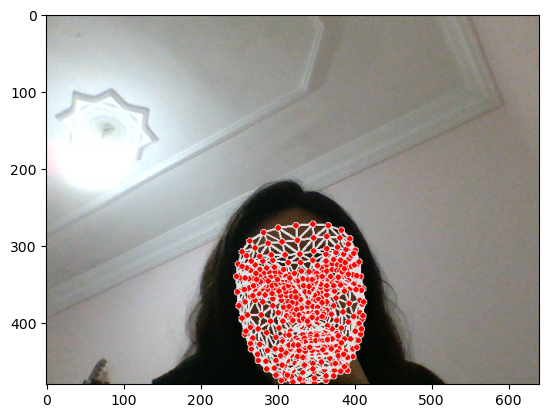

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.53129983,  0.78039569, -2.24268055, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.53129983,  0.78039569, -2.24268055, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
# Setup Folders for Collection

# Path for exported data, numpy arrays
__file__ = 'interactive_shell'
ROOT_PATH = os.path.dirname(os.path.abspath(__file__))
DATA_PATH = os.path.join(ROOT_PATH, 'MP_Data').replace('\\','/')

if not os.path.exists(DATA_PATH):
    os.mkdir(DATA_PATH)
    
# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [20]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [21]:
# Collect Keypoint Values for Training and Testing

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(200)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num)).replace('\\','/')
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [22]:
cap.release()
cv2.destroyAllWindows()

In [23]:
# Preprocess Data and Create Labels and Features
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
label_map = {label:num for num, label in enumerate(actions)}

In [25]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [27]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action).replace('\\','/'))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [28]:
np.array(sequences).shape

(90, 30, 1662)

In [29]:
np.array(labels).shape

(90,)

In [30]:
X = np.array(sequences)

In [31]:
X.shape

(90, 30, 1662)

In [32]:
y = to_categorical(labels).astype(int)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [34]:
y_test.shape

(5, 3)

In [35]:
# Build and Train LSTM Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [36]:
log_dir = os.path.join('Logs').replace('\\','/')
tb_callback = TensorBoard(log_dir=log_dir)

In [37]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [38]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
3/3 [==============================] - 20s 228ms/step - loss: 1.5683 - categorical_accuracy: 0.3176
Epoch 2/500
3/3 [==============================] - 1s 297ms/step - loss: 2.5364 - categorical_accuracy: 0.3176
Epoch 3/500
3/3 [==============================] - 1s 231ms/step - loss: 3.0390 - categorical_accuracy: 0.3882
Epoch 4/500
3/3 [==============================] - 1s 221ms/step - loss: 2.5750 - categorical_accuracy: 0.3176
Epoch 5/500
3/3 [==============================] - 1s 159ms/step - loss: 1.4605 - categorical_accuracy: 0.3294
Epoch 6/500
3/3 [==============================] - 0s 152ms/step - loss: 1.2887 - categorical_accuracy: 0.2706
Epoch 7/500
3/3 [==============================] - 1s 185ms/step - loss: 1.5571 - categorical_accuracy: 0.3882
Epoch 8/500
3/3 [==============================] - 1s 175ms/step - loss: 17.7928 - categorical_accuracy: 0.2706
Epoch 9/500
3/3 [==============================] - 1s 173ms/step - loss: 3.2814 - categorical_accuracy: 0.3529

3/3 [==============================] - 1s 175ms/step - loss: 0.3191 - categorical_accuracy: 0.8353
Epoch 75/500
3/3 [==============================] - 1s 165ms/step - loss: 0.2953 - categorical_accuracy: 0.9294
Epoch 76/500
3/3 [==============================] - 1s 166ms/step - loss: 0.2998 - categorical_accuracy: 0.8588
Epoch 77/500
3/3 [==============================] - 0s 151ms/step - loss: 0.2466 - categorical_accuracy: 0.9059
Epoch 78/500
3/3 [==============================] - 0s 164ms/step - loss: 0.2441 - categorical_accuracy: 0.9059
Epoch 79/500
3/3 [==============================] - 1s 175ms/step - loss: 0.2926 - categorical_accuracy: 0.8471
Epoch 80/500
3/3 [==============================] - 1s 171ms/step - loss: 0.4373 - categorical_accuracy: 0.7294
Epoch 81/500
3/3 [==============================] - 0s 144ms/step - loss: 5.2109 - categorical_accuracy: 0.3647
Epoch 82/500
3/3 [==============================] - 1s 166ms/step - loss: 11.5179 - categorical_accuracy: 0.1765
Epoc

3/3 [==============================] - 1s 185ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 147/500
3/3 [==============================] - 1s 217ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 148/500
3/3 [==============================] - 1s 176ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 149/500
3/3 [==============================] - 0s 145ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 150/500
3/3 [==============================] - 1s 212ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 151/500
3/3 [==============================] - 1s 171ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 152/500
3/3 [==============================] - 1s 170ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 153/500
3/3 [==============================] - 0s 159ms/step - loss: 1.0980 - categorical_accuracy: 0.3412
Epoch 154/500
3/3 [==============================] - 1s 172ms/step - loss: 5.2738 - categorical_accuracy: 0.34

3/3 [==============================] - 1s 185ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 219/500
3/3 [==============================] - 0s 139ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 220/500
3/3 [==============================] - 1s 172ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 221/500
3/3 [==============================] - 1s 182ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 222/500
3/3 [==============================] - 1s 171ms/step - loss: 1.0981 - categorical_accuracy: 0.3529
Epoch 223/500
3/3 [==============================] - 0s 141ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 224/500
3/3 [==============================] - 1s 184ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 225/500
3/3 [==============================] - 1s 168ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 226/500
3/3 [==============================] - 1s 166ms/step - loss: 1.0980 - categorical_accuracy: 0.35

3/3 [==============================] - 1s 210ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 291/500
3/3 [==============================] - 1s 293ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 292/500
3/3 [==============================] - 1s 261ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 293/500
3/3 [==============================] - 1s 219ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 294/500
3/3 [==============================] - 1s 244ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 295/500
3/3 [==============================] - 1s 229ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 296/500
3/3 [==============================] - 1s 208ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 297/500
3/3 [==============================] - 1s 233ms/step - loss: 1.0980 - categorical_accuracy: 0.3529
Epoch 298/500
3/3 [==============================] - 1s 166ms/step - loss: 1.0980 - categorical_accuracy: 0.35

3/3 [==============================] - 1s 172ms/step - loss: 1.0978 - categorical_accuracy: 0.3529
Epoch 363/500
3/3 [==============================] - 1s 171ms/step - loss: 1.0977 - categorical_accuracy: 0.3529
Epoch 364/500
3/3 [==============================] - 0s 148ms/step - loss: 1.0977 - categorical_accuracy: 0.3529
Epoch 365/500
3/3 [==============================] - 1s 169ms/step - loss: 1.0977 - categorical_accuracy: 0.2824
Epoch 366/500
3/3 [==============================] - 1s 172ms/step - loss: 1.0976 - categorical_accuracy: 0.3412
Epoch 367/500
3/3 [==============================] - 1s 165ms/step - loss: 1.0975 - categorical_accuracy: 0.3412
Epoch 368/500
3/3 [==============================] - 0s 147ms/step - loss: 1.0974 - categorical_accuracy: 0.3412
Epoch 369/500
3/3 [==============================] - 0s 162ms/step - loss: 1.0966 - categorical_accuracy: 0.3412
Epoch 370/500
3/3 [==============================] - 0s 161ms/step - loss: 7.5082 - categorical_accuracy: 0.32

3/3 [==============================] - 1s 202ms/step - loss: 1.0691 - categorical_accuracy: 0.3529
Epoch 435/500
3/3 [==============================] - 0s 134ms/step - loss: 1.0680 - categorical_accuracy: 0.3529
Epoch 436/500
3/3 [==============================] - 0s 160ms/step - loss: 1.0670 - categorical_accuracy: 0.3529
Epoch 437/500
3/3 [==============================] - 0s 169ms/step - loss: 1.0649 - categorical_accuracy: 0.3529
Epoch 438/500
3/3 [==============================] - 1s 173ms/step - loss: 1.0612 - categorical_accuracy: 0.3529
Epoch 439/500
3/3 [==============================] - 0s 132ms/step - loss: 1.0540 - categorical_accuracy: 0.3529
Epoch 440/500
3/3 [==============================] - 0s 167ms/step - loss: 1.0395 - categorical_accuracy: 0.3529
Epoch 441/500
3/3 [==============================] - 0s 159ms/step - loss: 0.9520 - categorical_accuracy: 0.3529
Epoch 442/500
3/3 [==============================] - 0s 170ms/step - loss: 1.2093 - categorical_accuracy: 0.35

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [41]:
# Make Predictions
res = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [42]:
actions[np.argmax(res[1])]

'hello'

In [43]:
actions[np.argmax(y_test[1])]

'iloveyou'

In [44]:
# Save Weights
model.save('action.h5')

In [45]:
model.load_weights('action.h5')

In [46]:
# Evaluation
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [47]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 97ms/step


In [48]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [49]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 3],
        [0, 1]],

       [[4, 0],
        [0, 1]],

       [[2, 0],
        [3, 0]]], dtype=int64)

In [50]:
accuracy_score(ytrue, yhat)

0.4

In [51]:
# Test in Real Time
from scipy import stats

In [52]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 72ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 88ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 87ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 88ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 103ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 106ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 112ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 111ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 107ms/step
hello
<class 'mediapipe

1/1 [==============================] - 0s 104ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 90ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 84ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 79ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 73ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 97ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 102ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 74ms/step
hello
<class 'mediapipe.py

1/1 [==============================] - 0s 71ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 66ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 74ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 70ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 69ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 68ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 73ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 75ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 78ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 82ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 75ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 87ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 65ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 96ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 118ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 99ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 87ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 83ms/step
hello
<class 'mediapipe.pyt